Image classifier - Dogs vs. Cats

In [51]:
#Libraries
import pandas as pd
import numpy as np
import os
import numpy as np
import zipfile
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import load_img
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import joblib

1. LOAD DATA

In [52]:
# Ruta al archivo ZIP
zip_path = "../dogs-vs-cats.zip" 
extract_to = "../data/raw"   

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


In [53]:
# Ruta al archivo ZIP
zip_path = "../data/raw/train.zip" 
extract_to = "../data/raw"       

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


In [54]:
# Ruta al archivo ZIP
zip_path = "../data/raw/test1.zip" 
extract_to = "../data/raw"       

# Extraer el archivo ZIP
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Archivo extraído correctamente en: {extract_to}")
else:
    print(f"El archivo ZIP no existe en la ruta: {zip_path}")

Archivo extraído correctamente en: ../data/raw


2. IMAGE VIEW AND PROCESSING

In [55]:
# Carpetas de entrada y salida
input_dir = "../data/raw/train"
output_dir = "../data/processed"
os.makedirs(output_dir, exist_ok=True)

# Procesar imágenes
image_size = (255, 255)
categories = ['cat', 'dog']

# Crear carpetas de salida para cada categoría
for category in categories:
    os.makedirs(os.path.join(output_dir, category), exist_ok=True)

# Redimensionar y mover las imágenes
for filename in os.listdir(input_dir):
    category = 'cat' if 'cat' in filename else 'dog'
    img_path = os.path.join(input_dir, filename)
    img = cv2.imread(img_path)
    if img is not None:
        img_resized = cv2.resize(img, image_size)
        save_path = os.path.join(output_dir, category, filename)
        cv2.imwrite(save_path, img_resized)

print("Todas las imágenes han sido redimensionadas y clasificadas.")

Todas las imágenes han sido redimensionadas y clasificadas.


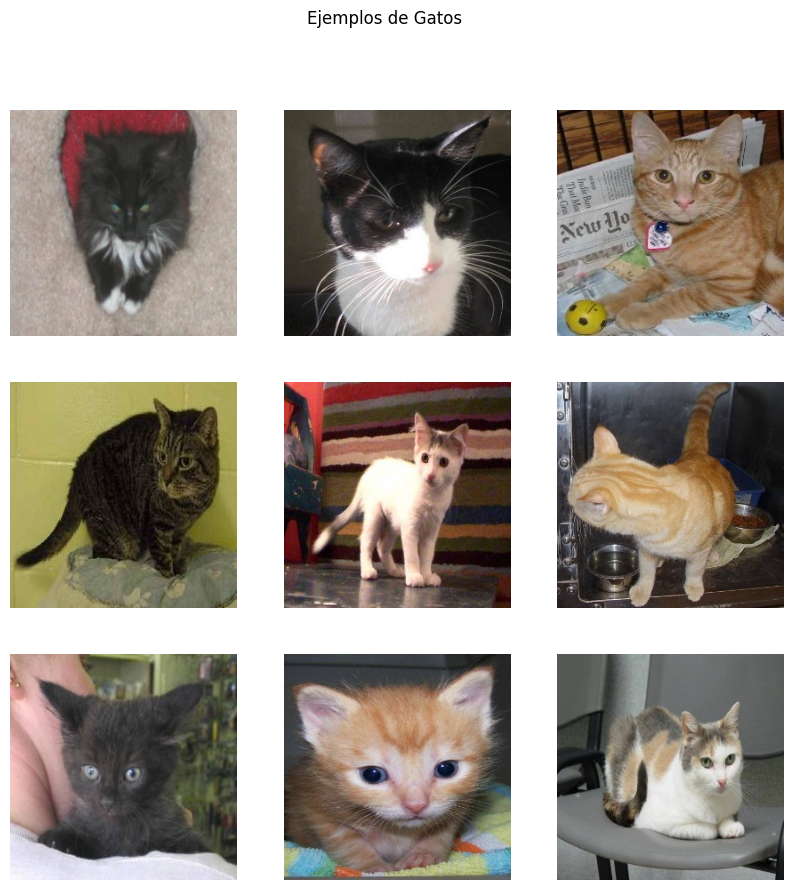

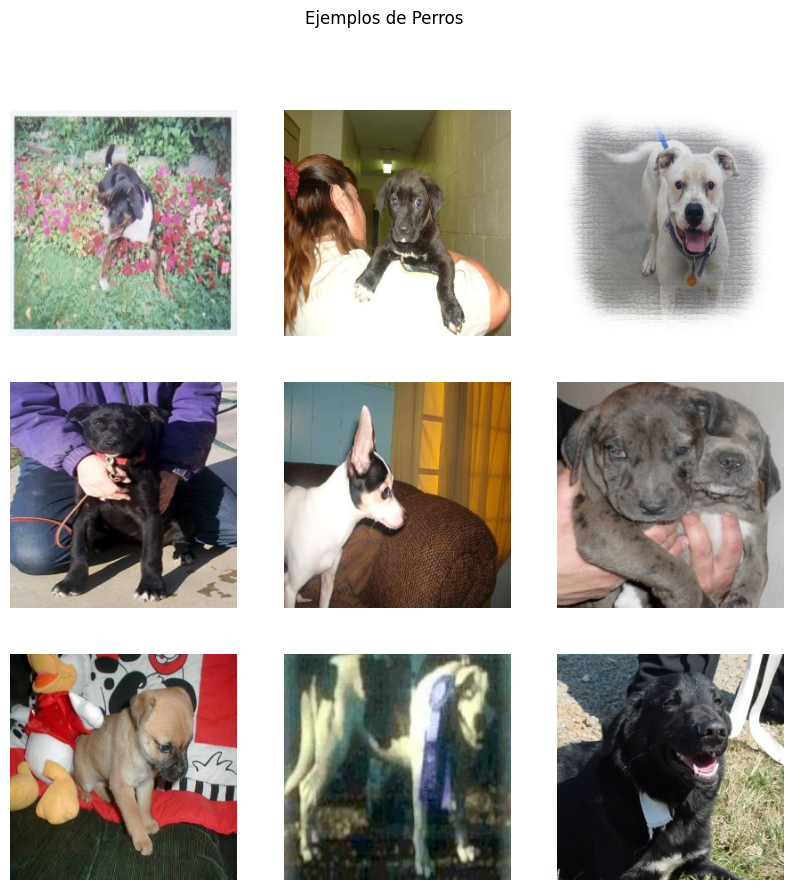

In [56]:
cat_images = [os.path.join(output_dir, "cat", img) for img in os.listdir(os.path.join(output_dir, "cat"))[:9]]
dog_images = [os.path.join(output_dir, "dog", img) for img in os.listdir(os.path.join(output_dir, "dog"))[:9]]

def plot_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths):
        plt.subplot(3, 3, i + 1)
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_images(cat_images, "Ejemplos de Gatos")
plot_images(dog_images, "Ejemplos de Perros")

3. BUILD CONVOLUTIONAL NEURAL NETWORK (CNN)

In [2]:
# Crear el modelo
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined